In [2]:
import cv2
import numpy as np
from natsort import natsorted
from glob import glob

import matplotlib.pyplot as plt
from tqdm import tqdm

from utils import search_params, semiglob_search_params

In [3]:
import os
cwd = os.getcwd()

# Stereo Matching

In [4]:
left_files = natsorted(glob(cwd + '/left_imgs/*.png'))
right_files = natsorted(glob(cwd + '/right_imgs/*.png'))
dis_files = natsorted(glob(cwd + '/disparities/*.png'))

num = len(left_files)

## 1. Local Method: 

- Block Matching Algorithms

- Semi Global Block Matching Algorithms

- linear Stereo Matching

### 1.1 Block Matching

In [4]:
block_size = np.arange(5, 51, 2)
max_disp = [16, 32, 64, 128, 256]

# Initialize variables to store the best parameters and the best score
best_block_size = None
best_max_disparity = None
best_score = float('inf')

In [5]:
# grid search on block size and max disparity
for bs in tqdm(block_size):
    for md in max_disp:
        rmse_sum = 0
        for left_file, right_file, dis_file in zip(left_files, right_files, dis_files):
            left_img = cv2.imread(left_file, 0)
            right_img = cv2.imread(right_file, 0)
            dis_gt_img = cv2.imread(dis_file, 0).astype(np.float32)
            rmse = search_params(left_img, right_img, dis_gt_img, bs, md)
            rmse_sum += rmse
        if rmse_sum < best_score:
            best_score = rmse
            best_block_size = bs
            best_max_disparity = md
        


100%|██████████| 23/23 [00:22<00:00,  1.04it/s]


In [6]:
print('Best block size: ', best_block_size, 'and best max disparity: ', best_max_disparity, 'best score: ', best_score/num)

Best block size:  13 and best max disparity:  64 best score:  1.821553330104559


In [7]:
# demo with last set pair of images
best_stereo = cv2.StereoBM_create(numDisparities=best_max_disparity, blockSize=best_block_size)
best_disparity = best_stereo.compute(left_img, right_img)
best_disparity = cv2.normalize(best_disparity, None, alpha=0, beta=best_max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

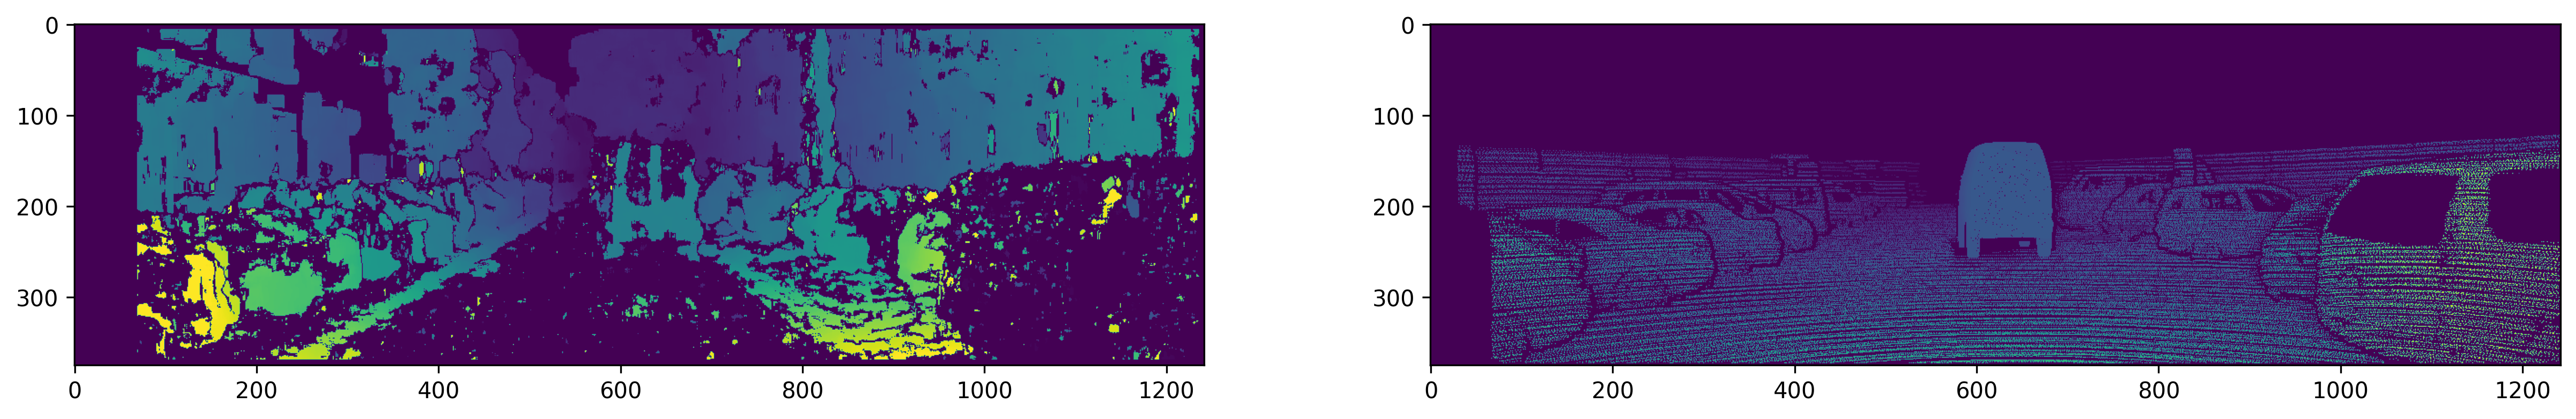

In [8]:
fig = plt.figure(figsize=(20, 20), dpi=300)
fig.add_subplot(1, 2, 1)
plt.imshow(best_disparity)
fig.add_subplot(1, 2, 2)
plt.imshow(dis_gt_img)
plt.show()

### 1.2 Semi Global Bloack Matching

In [5]:
block_size = np.arange(5, 51, 2)
max_disp = [16, 32, 64, 128, 256]

# Initialize variables to store the best parameters and the best score
best_block_size = None
best_max_disparity = None
best_score = float('inf')

In [6]:
# grid search on block size and max disparity
for bs in tqdm(block_size):
    for md in max_disp:
        rmse_sum = 0
        for left_file, right_file, dis_file in zip(left_files, right_files, dis_files):
            left_img = cv2.imread(left_file, 0)
            right_img = cv2.imread(right_file, 0)
            dis_gt_img = cv2.imread(dis_file, 0).astype(np.float32)
            rmse = semiglob_search_params(left_img, right_img, dis_gt_img, bs, md)
            rmse_sum += rmse
        if rmse_sum < best_score:
            best_score = rmse
            best_block_size = bs
            best_max_disparity = md

100%|██████████| 23/23 [00:48<00:00,  2.12s/it]


In [7]:
print('Best block size: ', best_block_size, 'and best max disparity: ', best_max_disparity, 'best score: ', best_score/num)

Best block size:  5 and best max disparity:  16 best score:  7.663528443299599


### 3. Linear Stereo Matching


In [8]:
""" to be continued """

' to be continued '

## 2. Global Method: 

- Graph Cut: slow and C++?

- Dynamic Programming


## 3. Deep Learning Method